Step 3: In this phase different loss function will be implemented for the 3 models from Step 2.

In [3]:
# Import libraries

import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import plot_model



import tensorflow_datasets as tfds

In [4]:
# Load the data

p_camelyon, p_camelyon_info = tfds.load("patch_camelyon", with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteORF4NF/patch_camelyon-test.tfrecord


  0%|          | 0/32768 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteORF4NF/patch_camelyon-train.tfrecord


  0%|          | 0/262144 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteORF4NF/patch_camelyon-validation.tfrecord


  0%|          | 0/32768 [00:00<?, ? examples/s]

Dataset patch_camelyon downloaded and prepared to /root/tensorflow_datasets/patch_camelyon/2.0.0. Subsequent calls will reuse this data.


In [5]:
# Defining a "normalize" function to process the data before feeding it into the deep neural network. 

def normalize(x):
  image, label = x['image'], x['label']
  image = tf.image.convert_image_dtype(image, tf.float32)
  label = tf.one_hot(label, 2, dtype=tf.float32)
  return image, label

In [6]:
# Applying "normalize" function along with others to the data

# Processing the training dataset
train_ds = p_camelyon['train'].map(normalize, num_parallel_calls=8)
train_ds = train_ds.shuffle(1024)
train_ds = train_ds.repeat()
train_ds = train_ds.batch(32)
train_ds = train_ds.prefetch(2)

# Processing validation dataset
validation_ds = p_camelyon['validation'].map(normalize, num_parallel_calls=8)
validation_ds = validation_ds.repeat()
validation_ds = validation_ds.batch(128)
validation_ds = validation_ds.prefetch(2)

#Processing the test dataset
test_ds = p_camelyon['test'].map(normalize, num_parallel_calls=8)
test_ds = test_ds.batch(128)
test_ds = test_ds.prefetch(2)

#Seperating image and label into different variables
train_images, train_labels = next(iter(train_ds))
valid_images, valid_labels = next(iter(validation_ds))
test_images, test_labels  = next(iter(test_ds))


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496 

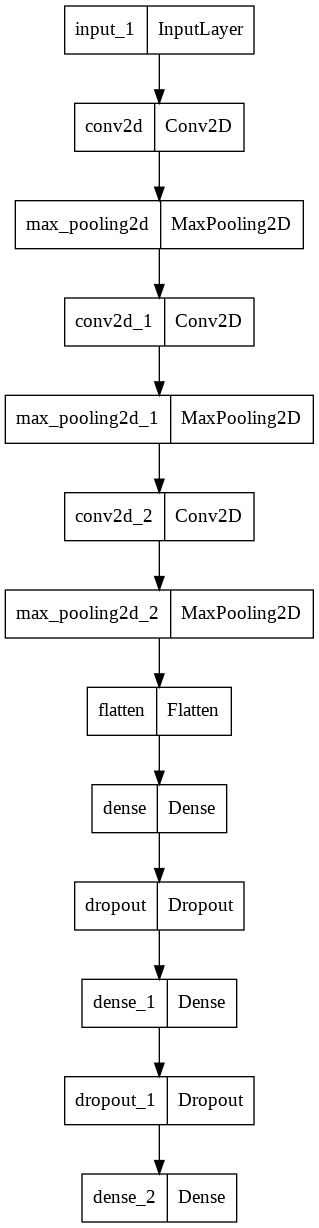

In [7]:
# Building the Convolutonal Nueral Network Model 1.1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Rely activation functions only, with softmax activation function for the last Dense layer
x = Conv2D(16, (3,3), activation='relu', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adam
# Loss function = hinge
model_1_1 = Model(inputs=input, outputs = output)
model_1_1.compile(optimizer='adam', 
              loss=tf.keras.losses.Hinge(),
              metrics=['acc'])

model_1_1.summary()
plot_model(model_1_1)

In [8]:
# Building the Convolutonal Nueral Network Model 1.2

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Rely activation functions only, with softmax activation function for the last Dense layer
x = Conv2D(16, (3,3), activation='relu', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adam
# Loss function =   MSE
model_1_2 = Model(inputs=input, outputs = output)
model_1_2.compile(optimizer='adam', 
              loss='MSE',
              metrics=['acc'])

model_1_2.summary()
#plot_model(model_1_2)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 47, 47, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 64)        1849

In [9]:
# Building the Convolutonal Nueral Network Model 2.1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Sigmoid activation functions only with softmax for the last Dense layer

x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='sigmoid')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adam
# Loss function = hinge
model_2_1 = Model(inputs=input, outputs = output)
model_2_1.compile(optimizer='adam', 
              loss=tf.keras.losses.Hinge(),
              metrics=['acc'])

model_2_1.summary()
#plot_model(model_2_1)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 47, 47, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 64)        1849

In [10]:
# Building the Convolutonal Nueral Network Model 2.2

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Sigmoid activation functions only with softmax for the last Dense layer

x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='sigmoid')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adam
# Loss function = MSE
model_2_2 = Model(inputs=input, outputs = output)
model_2_2.compile(optimizer='adam', 
              loss='MSE',
              metrics=['acc'])

model_2_2.summary()
#plot_model(model_2_2)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 47, 47, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 64)        1849

In [11]:
# Building the Convolutonal Nueral Network Model 3.1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# A conbination of relu and sigmoid activation functions
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adam
# Loss function = hinge
model_3_1 = Model(inputs=input, outputs = output)
model_3_1.compile(optimizer='adam', 
              loss=tf.keras.losses.Hinge(),
              metrics=['acc'])

model_3_1.summary()
#plot_model(model_3_1)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 47, 47, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 64)        1849

In [12]:
# Building the Convolutonal Network Model 3.2

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# A conbination of relu and sigmoid activation functions
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='sigmoid')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adam
# Loss function = MSE
model_3_2 = Model(inputs=input, outputs = output)
model_3_2.compile(optimizer='adam', 
              loss='MSE',
              metrics=['acc'])

model_3_2.summary()
#plot_model(model_3_2)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 47, 47, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 22, 22, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 20, 20, 64)        1849

In [13]:
import math

batch_size_for_training = 32
batch_size_for_validation = 128
batch_size_for_test = 128

training_size = 262144
validation_size = 32768
test_size =  32768
        

# Calculate steps for training and testing the model
calculate_steps_training = lambda x: int(math.ceil(1. * x / batch_size_for_training))
calculate_steps_validation = lambda x: int(math.ceil(1. * x / batch_size_for_validation))
calculate_steps_test= lambda x: int(math.ceil(1. * x / batch_size_for_test))

steps_per_epoch = calculate_steps_training(training_size) 
validation_steps = calculate_steps_validation(validation_size)
steps = calculate_steps_test(test_size)

print("Training steps: ", steps_per_epoch)
print("Validation steps: ", validation_steps)
print("Testing steps: ", steps)


Training steps:  8192
Validation steps:  256
Testing steps:  256


In [14]:
import matplotlib.pyplot as plt

def plot_hist(history):
  plt.plot(history.history["acc"])
  plt.plot(history.history["val_acc"])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(["train", "validation"], loc="upper left")
  plt.show()

In [15]:
# Training the model 1.1

history_1_1= model_1_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10
8192/8192 [==============================] - 106s 12ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 2/10
8192/8192 [==============================] - 91s 11ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 3/10
8192/8192 [==============================] - 93s 11ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 4/10
8192/8192 [==============================] - 91s 11ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 5/10
8192/8192 [==============================] - 98s 12ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 6/10
8192/8192 [==============================] - 93s 11ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 7/10
8192/8192 [==============================] - 91s 11ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 8/10
8192/8192 [=========================

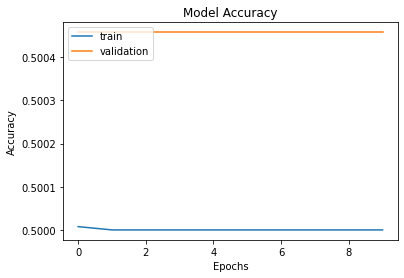

In [16]:
plot_hist(history_1_1)

In [17]:
# Training the model 1.2

history_1_2= model_1_2.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10
8192/8192 [==============================] - 92s 11ms/step - loss: 0.1205 - acc: 0.8330 - val_loss: 0.1173 - val_acc: 0.8387
Epoch 2/10
8192/8192 [==============================] - 88s 11ms/step - loss: 0.0873 - acc: 0.8834 - val_loss: 0.1126 - val_acc: 0.8437
Epoch 3/10
8192/8192 [==============================] - 90s 11ms/step - loss: 0.0745 - acc: 0.9015 - val_loss: 0.1314 - val_acc: 0.8271
Epoch 4/10
8192/8192 [==============================] - 110s 13ms/step - loss: 0.0659 - acc: 0.9142 - val_loss: 0.1604 - val_acc: 0.8004
Epoch 5/10
8192/8192 [==============================] - 93s 11ms/step - loss: 0.0577 - acc: 0.9255 - val_loss: 0.1224 - val_acc: 0.8421
Epoch 6/10
8192/8192 [==============================] - 91s 11ms/step - loss: 0.0526 - acc: 0.9328 - val_loss: 0.1536 - val_acc: 0.7999
Epoch 7/10
8192/8192 [==============================] - 114s 14ms/step - loss: 0.0467 - acc: 0.9411 - val_loss: 0.1505 - val_acc: 0.8142
Epoch 8/10
8192/8192 [========================

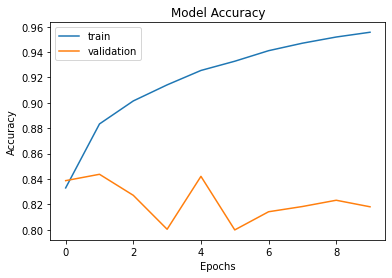

In [18]:
plot_hist(history_1_2)

In [19]:
# Training the model 2.1

history_2_1= model_2_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10
8192/8192 [==============================] - 94s 11ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 1.0005 - val_acc: 0.4995
Epoch 2/10
8192/8192 [==============================] - 90s 11ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 1.0005 - val_acc: 0.4995
Epoch 3/10
8192/8192 [==============================] - 92s 11ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 1.0005 - val_acc: 0.4995
Epoch 4/10
8192/8192 [==============================] - 91s 11ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 1.0005 - val_acc: 0.4995
Epoch 5/10
8192/8192 [==============================] - 97s 12ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 1.0005 - val_acc: 0.4995
Epoch 6/10
8192/8192 [==============================] - 91s 11ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 1.0005 - val_acc: 0.4995
Epoch 7/10
8192/8192 [==============================] - 95s 12ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 1.0005 - val_acc: 0.4995
Epoch 8/10
8192/8192 [==========================

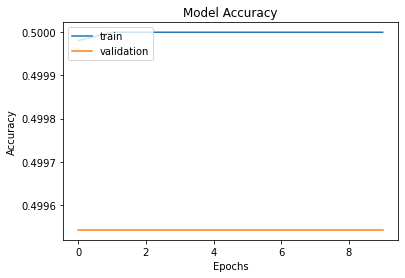

In [20]:
plot_hist(history_2_1)

In [21]:
# Training the model 2.2

history_2_2= model_2_2.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10
8192/8192 [==============================] - 93s 11ms/step - loss: 0.2510 - acc: 0.4992 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 2/10
8192/8192 [==============================] - 88s 11ms/step - loss: 0.2500 - acc: 0.5011 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 3/10
8192/8192 [==============================] - 91s 11ms/step - loss: 0.2500 - acc: 0.5008 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 4/10
8192/8192 [==============================] - 110s 13ms/step - loss: 0.2500 - acc: 0.5011 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 5/10
8192/8192 [==============================] - 90s 11ms/step - loss: 0.2500 - acc: 0.5003 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 6/10
8192/8192 [==============================] - 90s 11ms/step - loss: 0.2500 - acc: 0.5010 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 7/10
8192/8192 [==============================] - 97s 12ms/step - loss: 0.2500 - acc: 0.5006 - val_loss: 0.2500 - val_acc: 0.5005
Epoch 8/10
8192/8192 [=========================

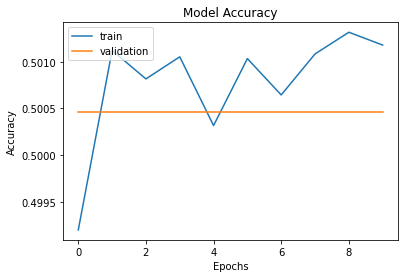

In [22]:
plot_hist(history_2_2)

In [23]:
# Training the model 3.1

history_3_1= model_3_1.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10
8192/8192 [==============================] - 94s 11ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 2/10
8192/8192 [==============================] - 89s 11ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 3/10
8192/8192 [==============================] - 92s 11ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 4/10
8192/8192 [==============================] - 91s 11ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 5/10
8192/8192 [==============================] - 96s 12ms/step - loss: 1.0000 - acc: 0.5000 - val_loss: 0.9995 - val_acc: 0.5005
Epoch 6/10
8192/8192 [==============================] - 92s 11ms/step - loss: 1.0005 - acc: 0.4994 - val_loss: 1.0000 - val_acc: 0.5005
Epoch 7/10
8192/8192 [==============================] - 93s 11ms/step - loss: 1.0002 - acc: 0.4999 - val_loss: 1.0005 - val_acc: 0.4995
Epoch 8/10
8192/8192 [==========================

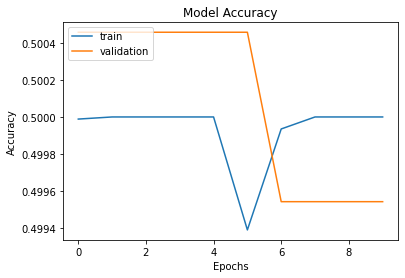

In [24]:
plot_hist(history_3_1)

In [25]:
# Training the model 3.2

history_3_2= model_3_2.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10
8192/8192 [==============================] - 93s 11ms/step - loss: 0.1845 - acc: 0.7145 - val_loss: 0.1692 - val_acc: 0.7430
Epoch 2/10
8192/8192 [==============================] - 88s 11ms/step - loss: 0.1382 - acc: 0.8051 - val_loss: 0.1445 - val_acc: 0.7886
Epoch 3/10
8192/8192 [==============================] - 90s 11ms/step - loss: 0.1241 - acc: 0.8269 - val_loss: 0.1455 - val_acc: 0.7945
Epoch 4/10
8192/8192 [==============================] - 89s 11ms/step - loss: 0.1160 - acc: 0.8394 - val_loss: 0.1402 - val_acc: 0.8011
Epoch 5/10
8192/8192 [==============================] - 93s 11ms/step - loss: 0.1089 - acc: 0.8505 - val_loss: 0.1524 - val_acc: 0.7771
Epoch 6/10
8192/8192 [==============================] - 89s 11ms/step - loss: 0.1039 - acc: 0.8577 - val_loss: 0.1627 - val_acc: 0.7747
Epoch 7/10
8192/8192 [==============================] - 95s 12ms/step - loss: 0.0988 - acc: 0.8661 - val_loss: 0.1432 - val_acc: 0.7946
Epoch 8/10
8192/8192 [==========================

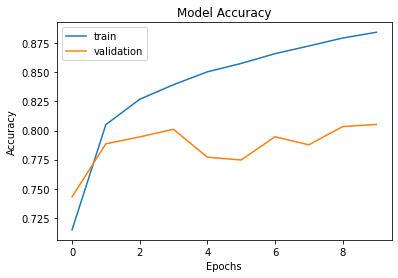

In [26]:
plot_hist(history_3_2)

In [27]:
# Testing the models

print("Test dataset accuracy for model 1.1 is: {0:.4f}".format(model_1_1.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 1.2 is: {0:.4f}".format(model_1_2.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 2.1 is: {0:.4f}".format(model_2_1.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 2.2 is: {0:.4f}".format(model_2_2.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 3.1 is: {0:.4f}".format(model_3_1.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 3.2 is: {0:.4f}".format(model_3_2.evaluate(test_ds, steps=steps, verbose=1)[1]))

256/256 [==============================] - 9s 34ms/step - loss: 0.9998 - acc: 0.5002
Test dataset accuracy for model 1.1 is: 0.5002
256/256 [==============================] - 8s 30ms/step - loss: 0.1635 - acc: 0.8047
Test dataset accuracy for model 1.2 is: 0.8047
256/256 [==============================] - 8s 30ms/step - loss: 1.0002 - acc: 0.4998
Test dataset accuracy for model 2.1 is: 0.4998
256/256 [==============================] - 8s 30ms/step - loss: 0.2501 - acc: 0.5002
Test dataset accuracy for model 2.2 is: 0.5002
256/256 [==============================] - 8s 30ms/step - loss: 1.0002 - acc: 0.4998
Test dataset accuracy for model 3.1 is: 0.4998
256/256 [==============================] - 8s 30ms/step - loss: 0.1559 - acc: 0.7886
Test dataset accuracy for model 3.2 is: 0.7886
